# Conceptos de funciones kernel y sus espacios RKHS
**Definición:** Un espacio de Hilbert $\mathcal{H}$ es un espacio de producto interno que es también un espacio métrico completo con respecto a la norma inducida por el producto interno.

**Definición:** Un kernel de Mercer es una función $k : \mathcal{X} \times \mathcal{X} \to \mathbb{R}$ continua, simétrica y definida positiva.

**Definición:** Un espacio de Hilbert con kernel reproductivo (RKHS) es un espacio de Hilbert $\mathcal{H}$ de funciones $f:\mathcal{X} \to \mathbb{R}$ con un kernel reproductivo  $k : \mathcal{X} \times \mathcal{X} \to \mathbb{R}$ donde $k(x, \cdot) \in \mathcal{H}$ y $f(x) = \langle k(x, \cdot) , f \rangle_{\mathcal{H}}$.

Consideremos un kernel $k(x, y)$. Para $n$ puntos fijamos una de las variables y nos queda $k(x_1, y), k(x_2, y),..., k(x_n, y)$, que son funciones de una sola variable. El RKHS asociado a estas funciones, es el espacio que estas funciones generan, es decir:
$$\mathcal{H} := \{f(\cdot) = \sum_{i=1}^n \alpha_i k(x_i, \cdot) \}$$

Sean $h, g \in \mathcal{H}$, entonces $h = \sum_{i=1}^m \alpha_i k(x_i, \cdot)$ y $g= \sum_{j=1}^l \beta_j k(x_j, \cdot)$ y su producto interno está dado por 
\begin{align}
\langle h , g \rangle_{\mathcal{H}} &= \left\langle \sum_{i=1}^m \alpha_i k(x_i, \cdot) , \sum_{j=1}^l \beta_j k(x_j, \cdot) \right\rangle_{\mathcal{H}} \\
&= \sum_{i=1}^m \sum_{j=1}^l \alpha_i  \beta_j \langle k(x_i, \cdot), k(x_j, \cdot) \rangle_{\mathcal{H}} \\
&= \sum_{i=1}^m \sum_{j=1}^l \alpha_i  \beta_j  k(x_i, x_j)
\end{align}

### Propiedad reproductiva
Si tomamos $h = \sum_{i=1}^m \alpha_i k(x_i, \cdot)$ y $g = k(x, \cdot)$, entonces se tiene 
\begin{align}
\langle h , g \rangle_{\mathcal{H}} &= \left\langle \sum_{i=1}^m \alpha_i k(x_i, \cdot) , k(x, \cdot) \right\rangle_{\mathcal{H}} \\
&= \sum_{i=1}^m \alpha_i   k(x_i, x) = h(x)
\end{align}
Es decir, la función $h$ es reproducida por el producto interno de la función con uno de los kernel en el espacio RKHS.

### Teorema de Mercer
Un kernel $k(x,y)$ se puede expresar como 
$$
k(x, y) = \sum_{i=1}^{\infty} \lambda_i \phi_i(x) \phi_i(y)
$$
donde $\lambda_i$ y $\phi_i$ son los valores y vectores propios, respectivamente, del operador integral asociado al kernel $k$

Definimos el mapeo $$\psi : \mathcal{X} \to \mathcal{F}$$
$$\psi(x) = [ \sqrt{\lambda_1} \phi_1(x), \sqrt{\lambda_2} \phi_2(x), ...]$$

Aquí, $\mathcal{F}$ es el espacio de características, y su dimensión está dada por el número de valores propios positivos.

Entonces, se tiene que $$k(x,y) = \psi(x)^T \psi(y) = \langle \psi(x), \psi(y) \rangle _{\mathcal{H}}$$

Por lo tanto, el kernel evaluado en un par de puntos es el producto interno del mapeo de dichos puntos en el espacio de características, cuya dimensión puede ser infinita.

#Kernel PCA
Consideremos un conjunto de datos $\{y_m\}$ con $m = 1, ..., M$, en un espacio de $L$ dimensiones. Supongamos que $\sum y_m = 0$. Para usar kernel, se requiere expresar PCA de tal manera que los datos $\{y_m\}$ aparezcan solo en la forma de productos escalares $y_m^Ty_n$. Recordemos que los componentes principales son los eigenvectores de la matriz de covarianza:

$$
\mathbf{C}\mathbf{v_i} = \lambda_i \mathbf{v_i}
$$

donde:
*   $\mathbf{C}$ es la matriz de covarianza muestral, de dimensión $L \times L$
*   $\mathbf{v_i}$ con $i = 1, ..., L$ son los eigenvectores de $\mathbf{C}$, de dimensión $L \times 1$
* $\lambda_i$ es el eigenvalor asociado a $\mathbf{v_i}$.

La matriz de covarianza muestral está definida como
$$\mathbf{C} = \frac{1}{M} \sum_{m=1}^M \mathbf{y_my_m^T}$$
y los eigenvectores están normalizados tal que $\mathbf{v_i}^T\mathbf{v_i}=1$.

Consideremos una transformación no lineal $\sigma(\mathbf{y})$ en un espacio de características de $P$ dimensiones. Ahora podemos realizar PCA en este espacio, lo que implícitamente define un modelo de componentes principales no lineal en el espacio original. Supongamos que $\sum \sigma(y_m) = 0$

La matriz $P \times P$ de covarianza muestral en el espacio de características está dada por:
$$\mathbf{B} = \frac{1}{M} \sum_{m=1}^M \sigma(\mathbf{y_m})\sigma(\mathbf{y_m})^T$$
y sus eigenvectores $\mathbf{w_i}$
$$\mathbf{Bw_i} = \lambda_i \mathbf{w_i}$$
para $i = 1,...,P$. Reemplazando $\mathbf{B}$ en la ecuación anterior se tiene
$$\frac{1}{M} \sum_{m=1}^M \sigma(\mathbf{y_m})\{\sigma(\mathbf{y_m})^T\mathbf{w_i}\} = \lambda_i \mathbf{w_i}$$
entonces, dado $\lambda_i >0$, se tiene
$$\mathbf{w_i} = \sum_{m=1}^M a_{im} \sigma(\mathbf{y_m})$$

con $a_{im} = \frac{1}{M \lambda_i}\sigma(\mathbf{y_m})^T\mathbf{w_i}$, y reemplazando en la ecuación de los eigenvectores
$$
\frac{1}{M} \sum_{m=1}^M \sigma(\mathbf{y_m})\sigma(\mathbf{y_m})^T  \sum_{n=1}^M a_{in} \sigma(\mathbf{y_n}) = \lambda_i \sum_{m=1}^M a_{im} \sigma(\mathbf{y_m})
$$
la idea es expresar todo en términos de la función kernel $q(\mathbf{y_n, y_m}) = \sigma(\mathbf{y_n})^T \sigma(\mathbf{y_m})$, así que multiplicamos a ambos lados por $\sigma(\mathbf{y_o})^T$
\begin{align}
 \frac{1}{M} \sigma(\mathbf{y_o})^T\sum_{m=1}^M \sigma(\mathbf{y_m})\sigma(\mathbf{y_m})^T  \sum_{n=1}^M a_{in} \sigma(\mathbf{y_n}) &=  \lambda_i \sigma(\mathbf{y_o})^T\sum_{m=1}^M a_{im} \sigma(\mathbf{y_m}) \\
 \frac{1}{M} \sum_{m=1}^M \{\sigma(\mathbf{y_o})^T \sigma(\mathbf{y_m}) \}\sigma(\mathbf{y_m})^T  \sum_{m=1}^M a_{in} \sigma(\mathbf{y_n}) &=  \lambda_i \sum_{m=1}^M a_{im} \sigma(\mathbf{y_o})^T\sigma(\mathbf{y_m}) \\
  \frac{1}{M} \sum_{m=1}^M q(\mathbf{y_o},\mathbf{y_m})\sum_{n=1}^M a_{in}  q(\mathbf{y_m}, \mathbf{y_n}) &=  \lambda_i \sum_{m=1}^M a_{im} q(\mathbf{y_o}, \mathbf{y_m})
\end{align}
que expresado en forma matricial queda como
$$
\mathbf{Q}^2 \mathbf{a}_i = \lambda_i M \mathbf{Q} \mathbf{a}_i 
$$
Si no consideramos los eigenvectores con eigenvalor 0, se puede expresar como
$$
\mathbf{Q} \mathbf{a}_i = \lambda_i M \mathbf{a}_i 
$$

La condición de normalización para los $\mathbf{a_i}$ se sigue de requerir que los eigenvectores del espacio de características estén normalizados:
$$
1 = \mathbf{w_i}^T\mathbf{w_i} = \sum_{m=1}^M \sum_{n=1}^M a_{im} a_{in} \sigma(\mathbf{y_m})^T \sigma(\mathbf{y_n}) = \mathbf{a}_i^T \mathbf{Q} \mathbf{a}_i = \lambda_i M \mathbf{a}_i^T \mathbf{a}_i 
$$
Se puede obtener la proyección sobre la $i$-ésima componente principal del espacio de características de la imagen de $\mathbf{y}$ mediante:
$$
z_i(\mathbf{y}) = \sigma(\mathbf{y})^T \mathbf{w_i} = \sum_{m=1}^M a_{im} \sigma(\mathbf{y}) ^T \sigma(\mathbf{y_m}) = \sum_{m=1}^M a_{im} q(\mathbf{y, y_m})
$$

Para poder realizar las proyecciones sobre las componentes principales en el espacio de características, se requiere que las imágenes del conjunto de datos esté centrada, pero como no se puede garantizar esto, se requiere ajustarlos antes de trabajar con ellos, restándoles la media de las imágenes
$$
\tilde{\sigma}(\mathbf{x}_m) = \sigma(\mathbf{x}_m) - \frac{1}{M}\sum_{k=1}^M \sigma(\mathbf{x}_k)
$$

Para evitar trabajar en el espacio de características, se realiza el ajuste directamente en la matriz de Gram
$$
\tilde{Q}_{mn} = \tilde{\sigma}(\mathbf{x}_m) ^T \tilde{\sigma}(\mathbf{x}_n)
$$
Al desarrollar la ecuación, y expresarlo en forma matricial, se obtiene finalmente
$$
\mathbf{\tilde{Q}} = \mathbf{Q} - \mathbf{1}_M\mathbf{Q} - \mathbf{Q}\mathbf{1}_M + \mathbf{1}_M\mathbf{Q}\mathbf{1}_M
$$
donde $\mathbf{1}_M$ es la matriz $M \times M$ con valor $1/M$ en todas sus entradas.

# Implementación de Kernel PCA

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_swiss_roll
seed = 123

In [66]:
# generar datos
M = 1000
X_sr, y = make_swiss_roll(M, noise=0.2, random_state=seed)
# definir el kernel
def rbf(x, y, gamma):
  return np.exp(-np.linalg.norm(x-y)**2*gamma)

def calcular_Q(X, kernel):
  "Calcula matriz de Gram de la imagen de X en el espacio inducido por el kernel"
  M = len(X)
  Q = np.zeros((M, M))
  for i in range(M):
    for j in range(i+1):
      Q[i, j] = kernel(X[i, :], X[j, :])
  return Q + Q.T - np.diag(Q.diagonal())

In [101]:
# cálculo matriz Q
Q = calcular_Q(X_sr, lambda x, y: rbf(x, y, 0.05)) # gamma = 0.03

# matriz 1_M
uno_M = 1/M*np.ones((M, M))

# matriz Q con \sigma(y) centrados
Q_centrada = Q - uno_M@Q - Q@uno_M + uno_M@Q@uno_M


In [102]:
# eigenvalores y eigenvectores
import scipy as sp
from sklearn.utils.validation import _check_psd_eigenvalues
from sklearn.utils.extmath import svd_flip

lambdas, a = sp.linalg.eigh(Q_centrada, subset_by_index=(0, M-1))
# se ordenan de forma descendente
idx = np.argsort(lambdas)[::-1]
lambdas = lambdas[idx]
a = a[:,idx]


In [107]:
# la proyección del espacio de características sobre sus componentes principales 
X_proy = np.dot(Q, a)

In [116]:
def plot_reduction(X_transformed, dim=2, y=None, label=None):
  fig = plt.figure(figsize=(9,6))
  if dim==2:
    ax = fig.add_subplot()
  else:
    ax = fig.add_subplot(projection='3d')
  if y is None:
    ax.scatter(*X_transformed[:,:dim].T, alpha=0.2)
  else:
    sc = ax.scatter(*X_transformed[:,:dim].T, c=y, cmap='jet')
    if label is None:
      plt.colorbar(sc)
    else:
      plt.colorbar(sc, label=label)
  return ax

<Axes: >

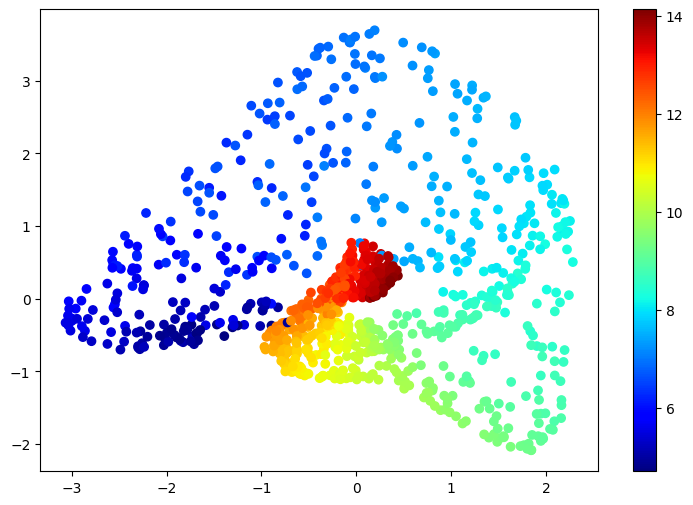

In [117]:
# proyección sobre las 2 componentes principales
plot_reduction(X_proy, 2, y=y)

In [118]:
from sklearn.decomposition import KernelPCA

In [119]:
# comparación con implementación de sklearn
kpca = KernelPCA(kernel='rbf', gamma=0.05)
X_proy2 = kpca.fit_transform(X_sr)

<Axes: >

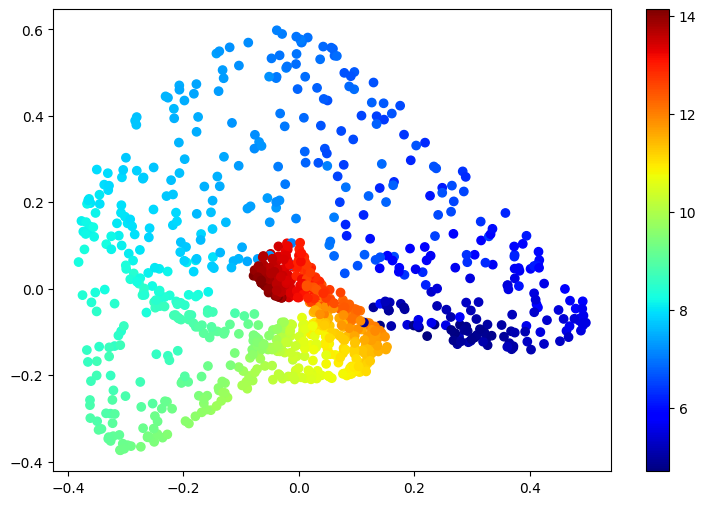

In [120]:
plot_reduction(X_proy2, y=y)

<Axes3D: >

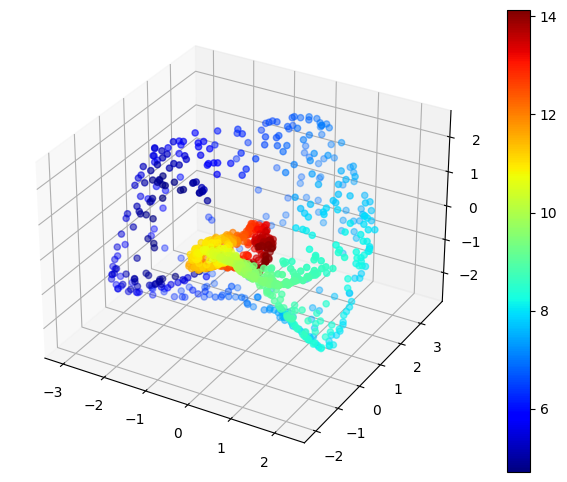

In [121]:
plot_reduction(X_proy, dim=3, y=y)

(0.6464047422808579, -0.4223350694924143)

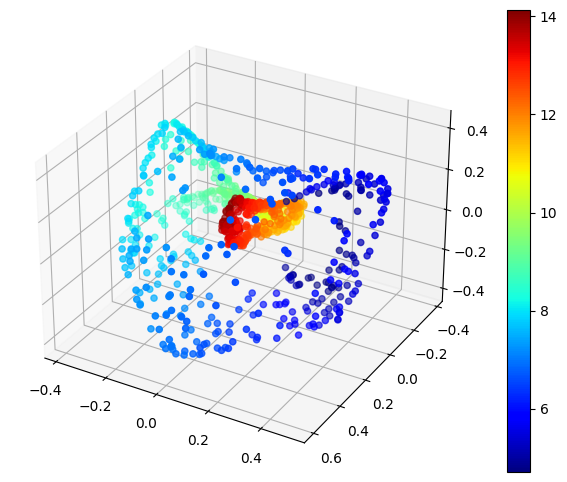

In [128]:
ax = plot_reduction(X_proy2, dim=3, y=y)
ax.set_ylim(ax.get_ylim()[::-1])